In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
pip install face_recognition

HOG features

In [3]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data, exposure
import cv2

In [4]:
image_srk=cv2.imread('/content/gdrive/My Drive/srk.jpg')

In [5]:
image_srk

array([[[ 77,  59,  58],
        [ 68,  50,  49],
        [ 63,  45,  44],
        ...,
        [ 82,  61,  59],
        [ 82,  61,  59],
        [ 82,  61,  59]],

       [[ 78,  60,  59],
        [ 69,  51,  50],
        [ 64,  46,  45],
        ...,
        [ 82,  61,  59],
        [ 82,  61,  59],
        [ 82,  61,  59]],

       [[ 79,  61,  60],
        [ 70,  52,  51],
        [ 65,  47,  46],
        ...,
        [ 82,  61,  59],
        [ 82,  61,  59],
        [ 82,  61,  59]],

       ...,

       [[171, 150, 148],
        [169, 148, 146],
        [166, 145, 143],
        ...,
        [167, 148, 141],
        [167, 148, 141],
        [167, 148, 141]],

       [[171, 150, 148],
        [169, 148, 146],
        [166, 145, 143],
        ...,
        [165, 146, 139],
        [165, 146, 139],
        [165, 146, 139]],

       [[171, 150, 148],
        [169, 148, 146],
        [166, 145, 143],
        ...,
        [165, 146, 139],
        [165, 146, 139],
        [165, 146, 139]]

In [6]:
#imread loads the image in BGR
image_srk=cv2.cvtColor(image_srk, cv2.COLOR_BGR2RGB)

In [7]:
fd, hog_image=hog(image_srk, orientations=8, pixels_per_cell=(16,16), cells_per_block=(1,1), visualize=True, multichannel=True)

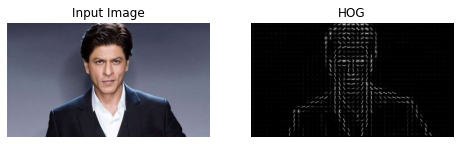

In [8]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(8,4),sharex=True, sharey=True)
ax1.axis('off')
ax1.imshow(image_srk,cmap=plt.cm.gray)
ax1.set_title('Input Image')
hog_image_rescaled=exposure.rescale_intensity(hog_image, in_range=(0,10))
ax2.axis('off')
ax2.imshow(hog_image_rescaled,cmap=plt.cm.gray)
ax2.set_title('HOG')
plt.show()

Face Detection

In [9]:
import face_recognition
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np
import cv2
%matplotlib inline

In [10]:
image_both=cv2.imread('/content/gdrive/My Drive/chrisboth.jpg')

In [11]:
image_both=cv2.cvtColor(image_both, cv2.COLOR_BGR2RGB)

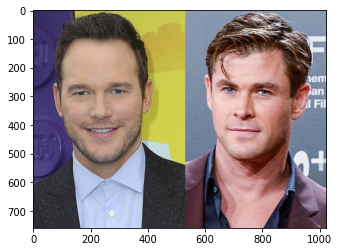

In [12]:
plt.imshow(image_both)

In [13]:
face_locations=face_recognition.face_locations(image_both)

In [14]:
num=len(face_locations)

In [15]:
print(num)

2


Face is located at px location Top:111 Left:231 Bottom:379 Right:498
Face is located at px location Top:617 Left:231 Bottom:884 Right:498


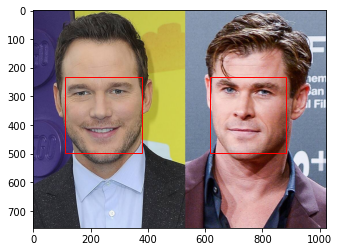

In [16]:
plt.imshow(image_both)
ax=plt.gca()
for face_location in face_locations:
  top,right,bottom,left=face_location
  x,y,w,h=left,top,right,bottom
  print('Face is located at px location Top:{} Left:{} Bottom:{} Right:{}'.format(x,y,w,h))
  rect=Rectangle((x,y),w-x,h-y,fill=False,color='red')
  ax.add_patch(rect)
plt.show()

Face Recognition

In [17]:
import face_recognition
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np
import cv2
%matplotlib inline

In [18]:
image_srk=cv2.imread('/content/gdrive/My Drive/srk.jpg')
image_srk=cv2.cvtColor(image_srk, cv2.COLOR_BGR2RGB)
image_dakota=cv2.imread('/content/gdrive/My Drive/dakota.jpg')
image_dakota=cv2.cvtColor(image_dakota, cv2.COLOR_BGR2RGB)
image_chrisp=cv2.imread('/content/gdrive/My Drive/chrisp.jpg')
image_chrisp=cv2.cvtColor(image_chrisp, cv2.COLOR_BGR2RGB)
image_chrish=cv2.imread('/content/gdrive/My Drive/chrish.jpg')
image_chrish=cv2.cvtColor(image_chrish, cv2.COLOR_BGR2RGB)


Creating Database

In [19]:
srk_encod=face_recognition.face_encodings(image_srk)[0]
chrish_encod=face_recognition.face_encodings(image_chrish)[0]
chrisp_encod=face_recognition.face_encodings(image_chrisp)[0]
dakota_encod=face_recognition.face_encodings(image_dakota)[0]
known_face_encod=[srk_encod,chrish_encod,chrisp_encod,dakota_encod]

In [20]:
#using image with both Chrises for test
unknown_faces=face_recognition.face_encodings(image_both)


In [21]:
from scipy.spatial import distance
for unknown_face in unknown_faces:
  results=[]
  for known_faces in known_face_encod:
    d=distance.euclidean(known_faces, unknown_face)
    results.append(d)
  threshold=0.6
  results=np.array(results)<=threshold
  name='Unknown'
  if results[0]:
    name='Shah Rukh Khan'
  elif results[1]:
    name='Chris Hemsworth'
  elif results[2]:
    name='Chris Pratt'
  elif results[3]:
    name='Dakota Johnson'

  print(f"Found {name} in the photo!")

Found Chris Pratt in the photo!
Found Chris Hemsworth in the photo!
